# Sunburst
Es un gráfico jerárquico radial. El gráfico realiza un "groupby" visual de varios niveles y muestra la variable numérica agregada resultante de cada agrupación como un segmento de un círculo. El tamaño de este segmento es proporcional a la proporción del valor de esta variable numérica con respecto a los otros grupos. Los niveles se construyen de adentro hacia afuera. Siendo el primer nivel (el mas central), la primera agrupación o la variable más alta en la jerarquía. Este gráfico acarrea las mismas denventajas que un Pie Chart.  
**Otros Nombres**: Gráfico de Anillo, Gráfico de pie multinivel.

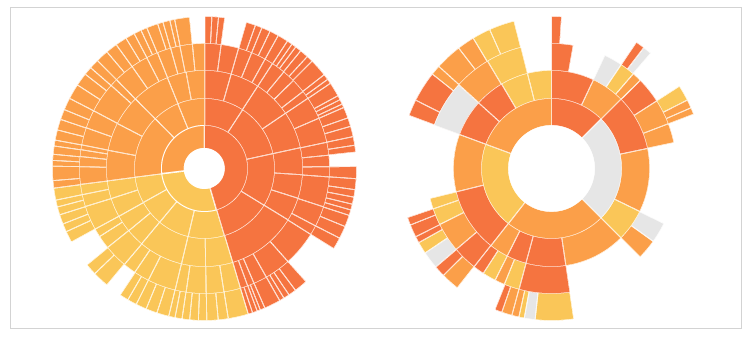


### Cuando utilizar
- Mi dataset tiene variables categóricas que codifican grupos de una manera jerárquica y quiero conocer las diferencias entre las **proporciones** de los valores de variables numéricas agregadas dentro de estos diferentes grupos y visualizar claramente como esta distribuida la jerarquía.

### Cuando no utilizar
- Si mis variables categóricas jerárquicas a agrupar son temporales, por ejemplo, años - meses - dias.
- Si tengo muchas categorias y las quiero mostrar todas el gráfico se vuelve ilegible. Podríamos optar por un Treemap.
- Una categoría representa +95% de los datos


### Consejos
- Es común utilizar colores en el gráfico para distinguir cada categoría del primer nivel. También se pueden utilizar intensidad de colores para codificar la variable numérica o una segunda variable numérica relacionada a los grupos.


## En esta clase
### Datos
1. Dataset 1: Información de expectativa de vida y población sobre paises del mundo a lo largo de los años
2. Dataset 2: Número de mensajes extraidos de Facebook publicados en páginas de marcas de retail    

### Objetivos
1. Visualizar la diferencia de la población a lo largo de los países del mundo en el año 2007.
2. Visualizar la diferencia entre la proporción de mensajes obtenidos en cada página de marca de retail por el tipo de tienda.

## Referencias
- https://datavizcatalogue.com/ES/metodos/diagrama_de_tarta_multinivel.html

In [2]:
import pandas as pd
import plotly.express as px

# Algunos ambientes van a necesitar este modo para poder visualizar los graficos de Plotly
import plotly
plotly.offline.init_notebook_mode(connected=True)

In [3]:
# Leemos los datos con Pandas
df = pd.read_csv('../data/paises_vida.csv')
df = df.dropna()
df = df[df['year'] == 2007]
df

,index,country,continent,year,lifeExp,pop,gdpPercap,iso_alpha,iso_num
11,11,Afghanistan,Asia,2007,43.828,31889923,974.580338,AFG,4
23,23,Albania,Europe,2007,76.423,3600523,5937.029526,ALB,8
35,35,Algeria,Africa,2007,72.301,33333216,6223.367465,DZA,12
47,47,Angola,Africa,2007,42.731,12420476,4797.231267,AGO,24
59,59,Argentina,Americas,2007,75.320,40301927,12779.379640,ARG,32
...,...,...,...,...,...,...,...,...,...
1655,1655,Vietnam,Asia,2007,74.249,85262356,2441.576404,VNM,704
1667,1667,West Bank and Gaza,Asia,2007,73.422,4018332,3025.349798,PSE,275
1679,1679,"Yemen, Rep.",Asia,2007,62.698,22211743,2280.769906,YEM,887
1691,1691,Zambia,Africa,2007,42.384,11746035,1271.211593,ZMB,894


In [4]:
# Sunburst en Plotly
# https://plotly.com/python/sunburst-charts/
fig = px.sunburst(
    df, 
    path=[px.Constant("world"), 'continent', 'country'], 
    values='pop',
    color='lifeExp', # Codificamos una segunda variable numérica utilizando colores
    color_continuous_scale='RdBu',
)
fig.show()

In [5]:
df2 = pd.read_csv('../data/marcas_mensajes.csv')
df2

,tipo,marca,n_mensajes
0,Apparel,Burberry,12767
1,Apparel,Calvin Klein,6515
2,Apparel,Forever 21,34460
3,Apparel,Lacoste,8862
4,Apparel,Ross,8139
...,...,...,...
81,Sporting Goods,Nike,21776
82,Supermarket,Albertsons,10649
83,Supermarket,Kroger,25714
84,Supermarket,WholeFoods,62112


In [6]:
fig = px.sunburst(
    df2, 
    path=['tipo', 'marca'], 
    values='n_mensajes'
)
# fig.data[0].textinfo = 'label+text+value'
fig.show()